## Exploring duplicate ids

In this notebook we examine several facts about those folks who showed up multiple
times in our surveys.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_first = pd.read_csv("data/deduplicated_data_first.csv")
df_last = pd.read_csv("data/deduplicated_data_last.csv")

In [3]:
# Some things to make sure I didn't screw anything up horribly
assert len(df_first) == len(df_last)
assert (df_first["user_id"].value_counts().value_counts() == df_last["user_id"].value_counts().value_counts()).all()
assert set(df_first["user_id"].dropna()) == set(df_last["user_id"].dropna())

In [5]:
# For those people who were in both surveys, here are some columns they really _should_
# be identical on?

comparison_cols = [
 'birthyr',
 'gender',
 'race',
 'educ',
 'marstat',
 'faminc_new',
 'pid3',
 'pid7',
 'presvote16post',
 'inputstate',
 'inputzip',
 'votereg',
 'ideo5',
 'newsint',
 'religpew',
 'pew_churatd',
 'pew_bornagain',
 'pew_religimp',
 'pew_prayer',
]

q_comparison_cols = [
    "q60_1",
    "q60_2",
    "q60_3",
    "q60_4",
    "q1"
]

In [6]:
blah_first = df_first[comparison_cols + q_comparison_cols + ["caseid", "user_id"]].dropna(subset=["user_id"])
blah_last = df_last[comparison_cols + q_comparison_cols + ["caseid", "user_id"]].dropna(subset=["user_id"])

merged_df = blah_first.merge(blah_last, on="user_id")
merged_df = merged_df[merged_df["caseid_x"] != merged_df["caseid_y"]]

new_df_dict = {}
for col in comparison_cols + q_comparison_cols:
    new_df_dict[col] = merged_df[f"{col}_x"] == merged_df[f"{col}_y"]

new_df = pd.DataFrame(new_df_dict)
new_df.describe().loc[["count", "freq"]].T

,count,freq
birthyr,178,166
gender,178,175
race,178,172
educ,178,164
marstat,178,175
faminc_new,178,161
pid3,178,166
pid7,178,145
presvote16post,178,177
inputstate,178,178


In [7]:
# So what's going on here? E.g., what's up with gender?
col = "birthyr"
merged_df.loc[merged_df[f"{col}_x"] != merged_df[f"{col}_y"], [f"{col}_x", f"{col}_y"]]

,birthyr_x,birthyr_y
17,1967.0,1963.0
21,1953.0,1954.0
27,1982.0,1984.0
49,1985.0,1965.0
73,1981.0,1980.0
102,1965.0,1969.0
104,1943.0,1945.0
110,1974.0,1975.0
111,1982.0,1981.0
131,1945.0,1994.0


In [8]:
# So what's going on here? E.g., what's up with gender?
col = "gender"
merged_df.loc[merged_df[f"{col}_x"] != merged_df[f"{col}_y"], [f"{col}_x", f"{col}_y"]]

,gender_x,gender_y
18,1.0,2.0
27,2.0,1.0
39,1.0,2.0


In [9]:
# So what's going on here? E.g., what's up with race?
col = "race"
merged_df.loc[merged_df[f"{col}_x"] != merged_df[f"{col}_y"], [f"{col}_x", f"{col}_y"]]

,race_x,race_y
17,7.0,1.0
18,2.0,4.0
27,3.0,2.0
40,7.0,6.0
58,7.0,6.0
95,7.0,8.0


<AxesSubplot:title={'center':'Change in pid7 among 33 people who changed'}>

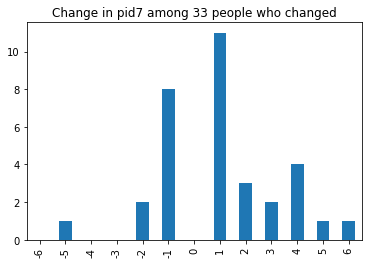

In [10]:
# So what's going on here? E.g., what's up with pid7?
col = "pid7"
dddf = merged_df.loc[merged_df[f"{col}_x"] != merged_df[f"{col}_y"], [f"{col}_x", f"{col}_y"]]
s = (dddf[f"{col}_x"] - dddf[f"{col}_y"]).value_counts().sort_index()
s.index = s.index.astype(int)
s = s.reindex(np.arange(-6, 7, dtype=int))
s.plot.bar(title=f"Change in pid7 among {len(dddf)} people who changed")

<AxesSubplot:title={'center':'Change in q1 among 78 people who changed'}>

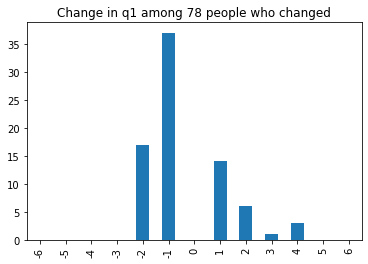

In [11]:
# So what's going on here? E.g., what's up with q1?
col = "q1"
dddf = merged_df.loc[merged_df[f"{col}_x"] != merged_df[f"{col}_y"], [f"{col}_x", f"{col}_y"]]
s = (dddf[f"{col}_x"] - dddf[f"{col}_y"]).value_counts().sort_index()
s.index = s.index.astype(int)
s = s.reindex(np.arange(-6, 7, dtype=int))
s.plot.bar(title=f"Change in {col} among {len(dddf)} people who changed")

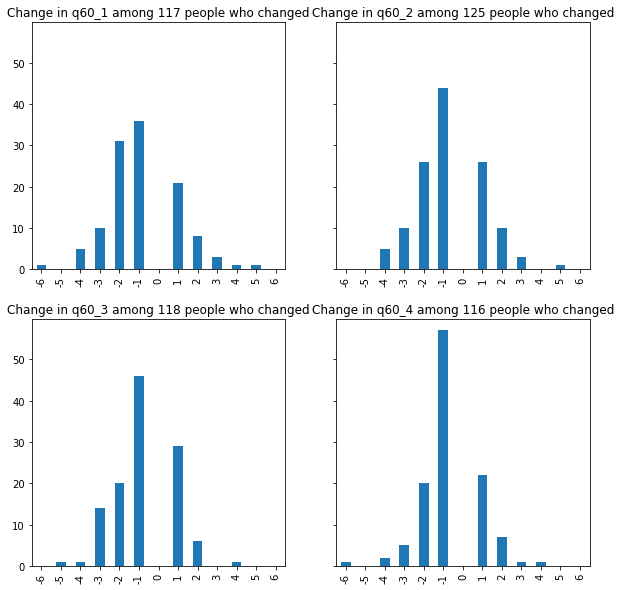

In [12]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10, 10))
for endpt, ax in zip(range(1, 5), axs.flatten()):
    # So what's going on here? E.g., what's up with q1?
    col = f"q60_{endpt}"
    dddf = merged_df.loc[merged_df[f"{col}_x"] != merged_df[f"{col}_y"], [f"{col}_x", f"{col}_y"]]
    s = (dddf[f"{col}_x"] - dddf[f"{col}_y"]).value_counts().sort_index()
    s.index = s.index.astype(int)
    s = s.reindex(np.arange(-6, 7, dtype=int))
    s.plot.bar(ax=ax, title=f"Change in {col} among {len(dddf)} people who changed")

In [13]:
first_matches_df = pd.read_csv("data/calculated/outcome_analysis_study1_first.rda.csv")
last_matches_df = pd.read_csv("data/calculated/outcome_analysis_study1_last.rda.csv")

In [14]:
from typing import Union

def cleanup_id_col(val: Union[str, int, float]) -> float:
    if isinstance(val, (float, int)):
        return val
    if isinstance(val, str):
        val = val.strip()
        if val:
            return int(val)
        return np.nan


id_df = pd.read_csv("data/BROW0016_OUTPUT_20220207.csv")
id_df = id_df[["caseid", "caseid_13", "caseid_14", "caseid_15"]]
for col in id_df:
    id_df[col] = id_df[col].apply(cleanup_id_col).astype("Int64")

id_df["user_id"] = np.arange(len(id_df), dtype=int)
id_df = id_df.rename(
    columns={
        "caseid": "caseid_16",
    },
).melt(id_vars=["user_id"], value_name="caseid", var_name="which_survey")\
.dropna(subset=["caseid"])

In [15]:
first_matches_df = first_matches_df.merge(id_df, how="left", left_on="orig_id", right_on="caseid")
first_matches_df["user_id"] = first_matches_df["user_id"].fillna(first_matches_df["orig_id"])

last_matches_df = last_matches_df.merge(id_df, how="left", left_on="orig_id", right_on="caseid")
last_matches_df["user_id"] = last_matches_df["user_id"].fillna(last_matches_df["orig_id"])


In [16]:
def probably_unique_id(col: pd.Series) -> str:
    """
    As a way of checking if all the pairs are the same or not, just create a simple
    hash of the underlying user ids. 
    """
    assert len(col) == 2
    col = col.sort_values()
    return f"{col.iloc[0]}|{col.iloc[1]}"

In [17]:
# How many matches are identical depending on whether we use the
# first or the last match? About 75%
print(
    len(
        set(first_matches_df.groupby("bm")["user_id"].agg(probably_unique_id)) & 
        set(last_matches_df.groupby("bm")["user_id"].agg(probably_unique_id))
    )
)

print(min(first_matches_df["bm"].nunique(), last_matches_df["bm"].nunique()))

288
393
